In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 17.8 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import torch
import os
from IPython.display import display , Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 911, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'track', 'benchmark', 'train', 'predict', 'export', 'val'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'pose', 'detect', 'obb', 'segment'}
                MODE (required) is one of {'track', 'benchmark', 'train', 'predict', 'export', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("heithemxnoor").project("carracterdetection")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to carracterdetection-2 in yolov8:: 100%|██████████| 1493/1493 [00:00<00:00, 7101.00it/s]


In [4]:
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=35 imgsz=640 patience=5


100% 83.7M/83.7M [00:00<00:00, 386MB/s]
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/carracterdetection-2/data.yaml, epochs=35, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

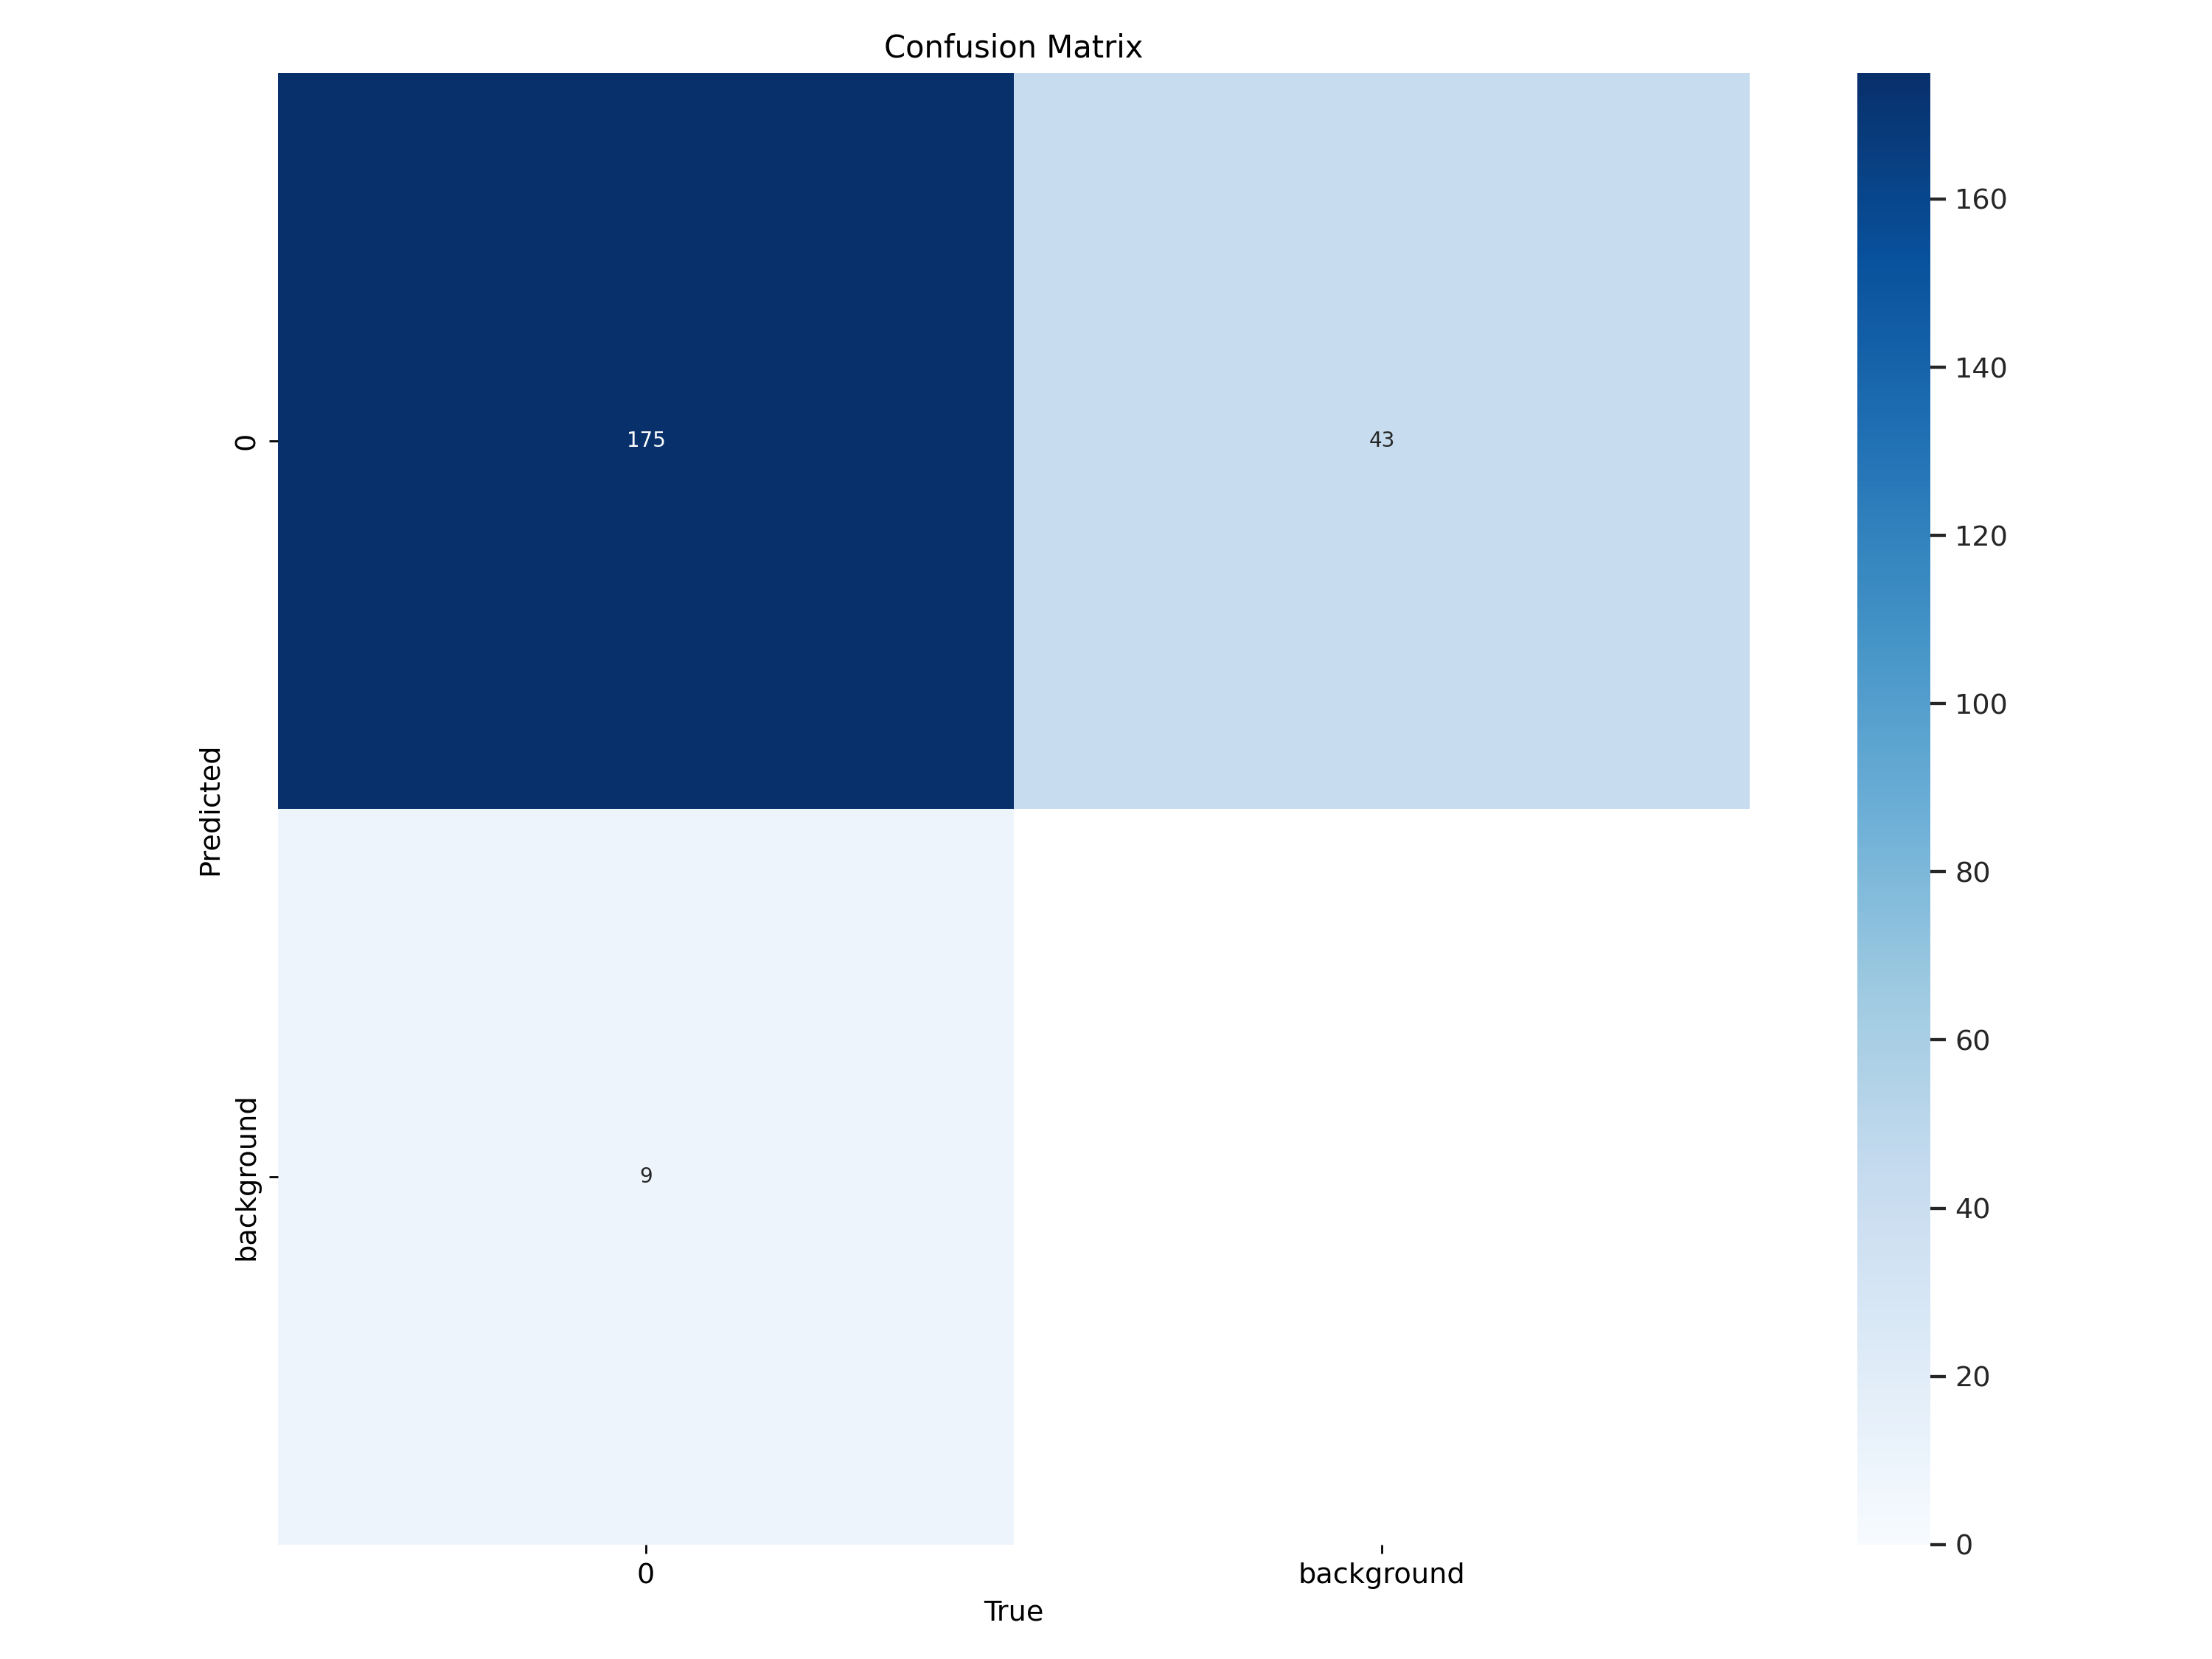

In [5]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

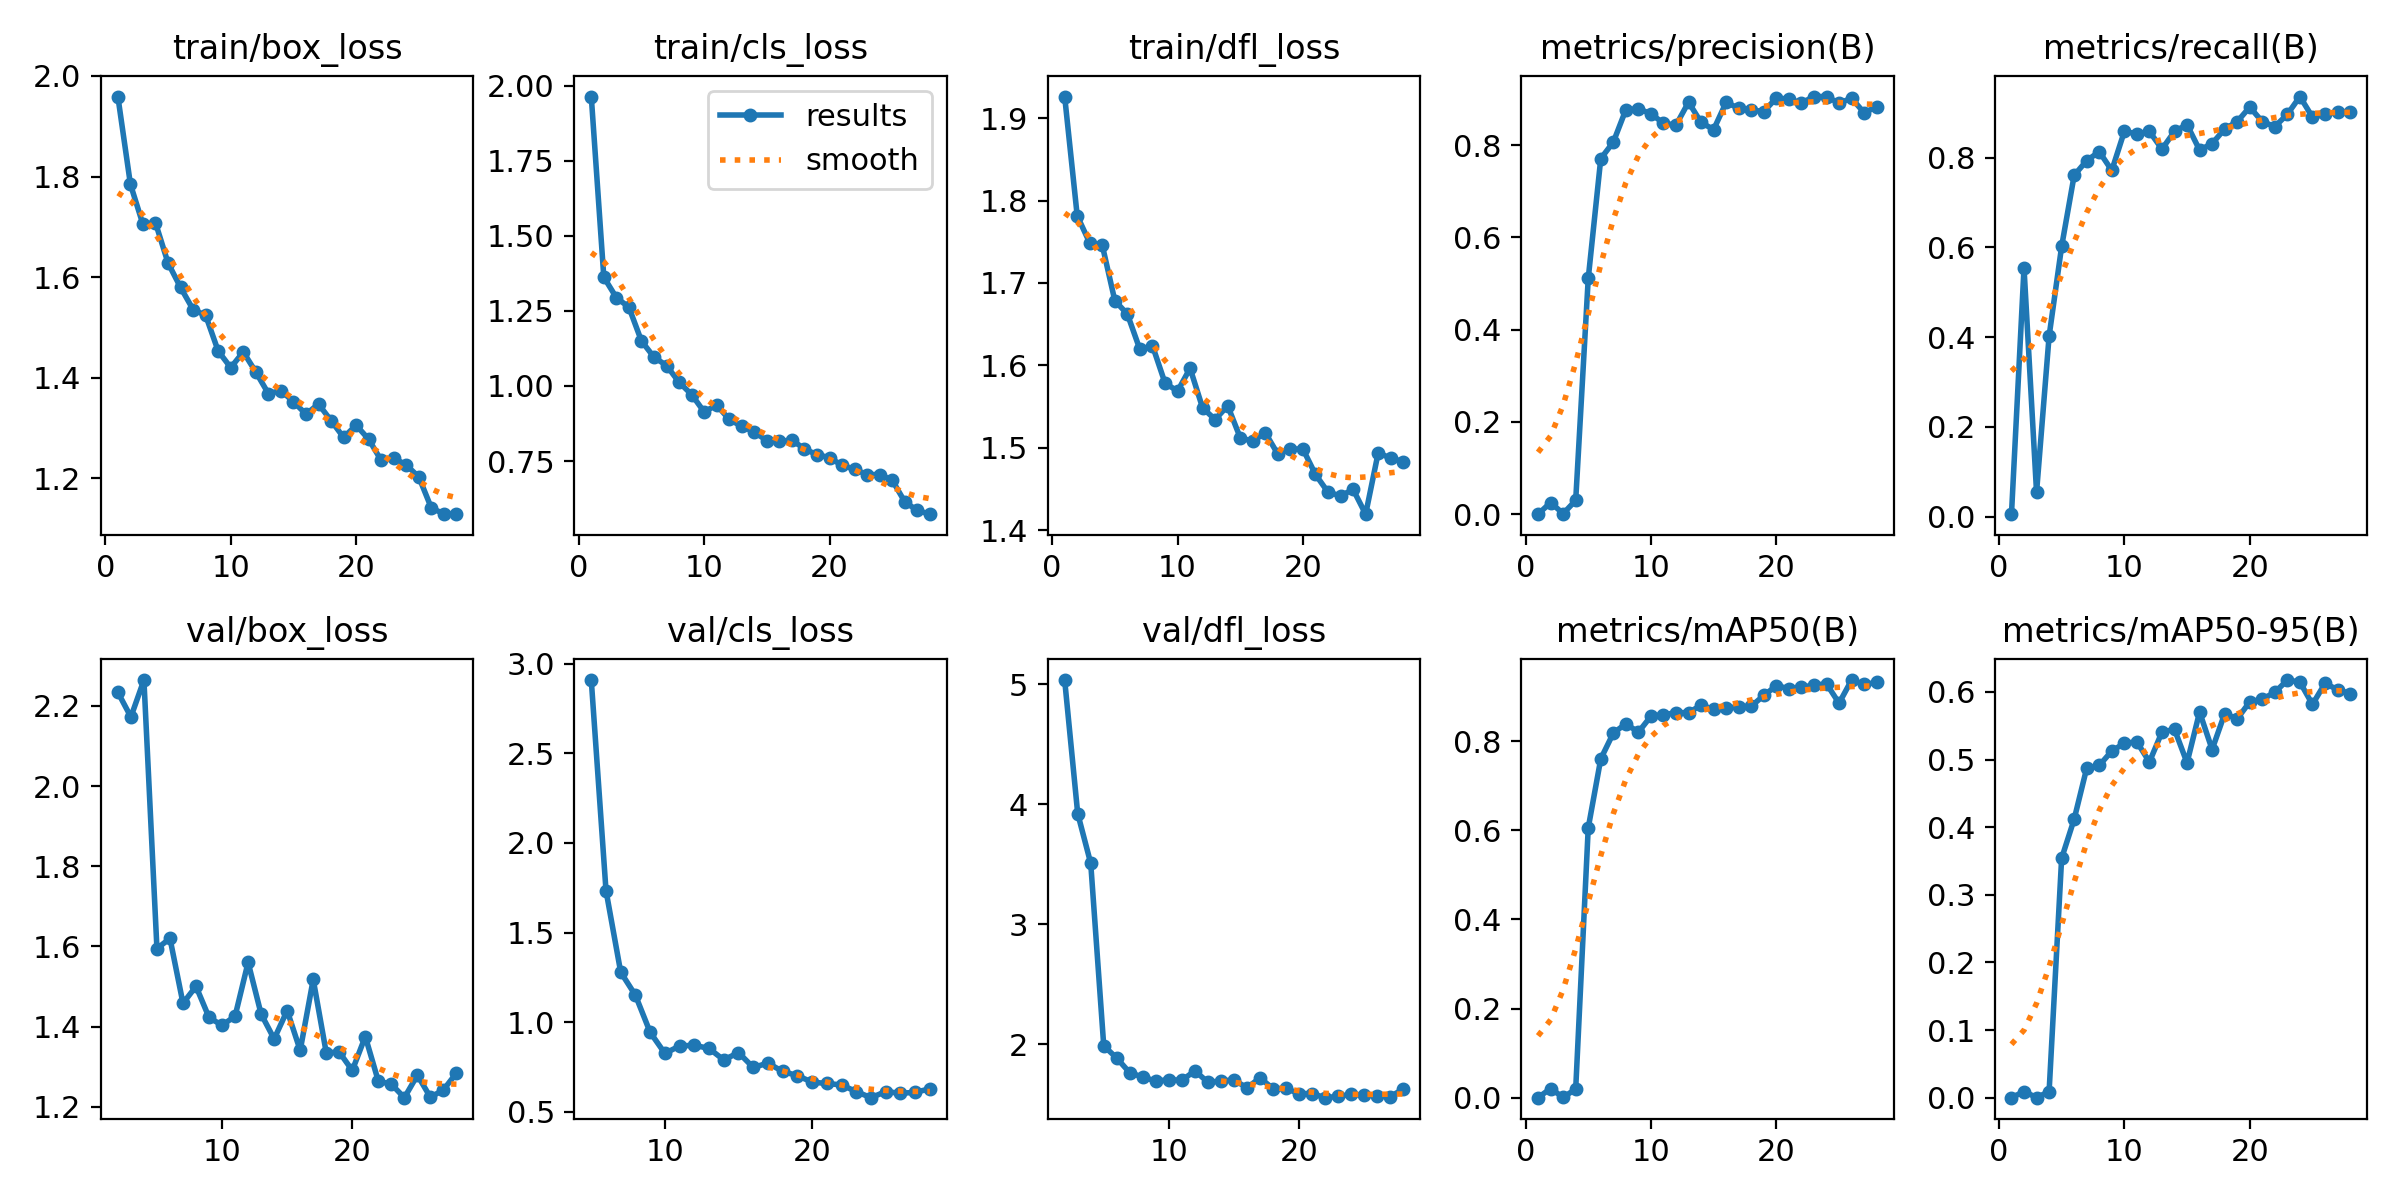

In [6]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [7]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images save=True



Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs

image 1/92 /content/carracterdetection-2/test/images/1732559454240_jpg_bbox0_jpg.rf.4da665e6a3aa61e7d6704a259647a814.jpg: 640x640 9 0s, 62.6ms
image 2/92 /content/carracterdetection-2/test/images/1732559454258_jpg_bbox0_jpg.rf.57bfa1bc680e10569ffb33fce7c52113.jpg: 640x640 9 0s, 42.7ms
image 3/92 /content/carracterdetection-2/test/images/1732559454357_jpg_bbox0_jpg.rf.1cc4a5137594f394d13ce8b92be0f835.jpg: 640x640 10 0s, 42.6ms
image 4/92 /content/carracterdetection-2/test/images/1732559454413_jpg_bbox0_jpg.rf.684d71a101e3e45a1ec7a885ad870cb4.jpg: 640x640 8 0s, 42.6ms
image 5/92 /content/carracterdetection-2/test/images/1732559454476_jpg_bbox0_jpg.rf.1daa95a1df2e987b9e4de82eb2f5b840.jpg: 640x640 8 0s, 42.6ms
image 6/92 /content/carracterdetection-2/test/images/1732559454578_jpg_bbox0_jpg.rf.5e8f74941e24fe1adc8f10ab55fbf92a.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save("/content/runs/detect/train/weights/best.pt")